# First break picking. Loading and plotting markup.

## Problem description

We need to be able to load labels for segy files in batch components in order to train supervised models

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import dill
import matplotlib.pyplot as plt
from functools import partial
from hmmlearn import hmm

sys.path.append('..')

from seismicpro.batchflow import Dataset, Pipeline, B, V, F

from seismicpro.src import (SeismicBatch, FieldIndex, TraceIndex,
                            merge_picking_files, seismic_plot)

## Datasets

Train datasets are given by 3 segy files and corresponding csv files with picking labels.   
Table bellow shows the number of labeled Field Records in each segy file as well as the range of trace numbers among Field Records. 

### Train data

<a href="https://imgbb.com/"><img src="https://i.ibb.co/GJqjDZN/Screenshot-from-2019-04-22-13-33-45.png" alt="Screenshot-from-2019-04-22-13-33-45" border="0"></a>

### Test data

<a href="https://savepice.ru" target="_blank" title="хостинг картинок"><img src="https://cdn1.savepice.ru/uploads/2019/4/22/76124fced05acb5ab1ca4e6d1e72f0bc-full.png" border="0"/></a>

Files with labels must have the following format with 3 columns: FiledRecord TraceNumber PickingTime 

In [2]:
df = pd.read_csv('/notebooks/egor/FB/Pal/Pal_Flatiron_1k_picking.csv')

In [3]:
df.head()

,FieldRecord,TraceNumber,y
0,10407,1956,77.291588
1,10407,1957,75.197472
2,10407,1955,95.463326
3,10407,1958,96.654495
4,10407,1954,114.333763


## Loading picking

In oder to load labels into segy files index specify the argument ** markup_path **.

In [4]:
path_raw = '/notebooks/egor/FB/Pal/Pal_Flatiron_1k.sgy'
index = (FieldIndex(name='raw', path=path_raw, 
                    markup_path='/notebooks/egor/FB/Pal/Pal_Flatiron_1k_picking.csv'))

Column **y** stand for picking time.

In [5]:
index.head()

,y,TraceNumber,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw
FieldRecord,,,,
10407,77.291588,1956,1,/notebooks/egor/FB/Pal/Pal_Flatiron_1k.sgy
10407,75.197472,1957,2,/notebooks/egor/FB/Pal/Pal_Flatiron_1k.sgy
10407,95.463326,1955,3,/notebooks/egor/FB/Pal/Pal_Flatiron_1k.sgy
10407,96.654495,1958,4,/notebooks/egor/FB/Pal/Pal_Flatiron_1k.sgy
10407,114.333763,1954,5,/notebooks/egor/FB/Pal/Pal_Flatiron_1k.sgy


Load data from segy index to batch component named **markup**

In [6]:
batch = (Dataset(index, SeismicBatch).next_batch(batch_size=1)
         .load(components='raw', fmt='segy')
         .load(components='markup', fmt='picks'))

## Plotting traces with picking

In oder to plot 2D traces and corresponding labels specify in the argument ** src_picking ** batch component with labels.

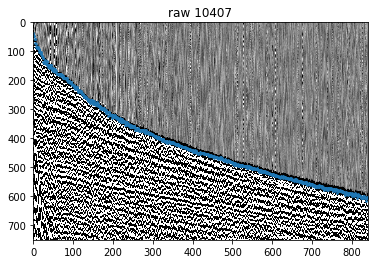

In [7]:
batch.seismic_plot(src='raw', index=index.indices[0], cmap='gray',vmin=-100,vmax=100, s=3,
                       src_picking='markup')